# Датасет

## загрузка данных

In [20]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Description  
Описание данных  
Данные состоят из 3 файлов:  

products.csv - товары с их харакретистиками  
transactions.csv - транзакции покупателей  
sample_submission.csv - пример файла, для понимания формата данных ответов  


**products.csv**  
product_id - уникальный идентификатор товара  
product_name - название товара  
aisle_id - уникальный идентификатор подкатегории  
department_id - уникальный идентификатор категории  
aisle - название подкатегории  
department - название категории  


**transactions.csv**  
order_id - уникальный идентификатор транзакции  
user_id - уникальный идентификатор покупателя  
order_number - номер транзакции в истории покупок данного пользователя  
order_dow - день недели транзакции  
order_hour_of_day - час совершения транзакции  
days_since_prior_order - количество дней с совершения предыдущей транзакции данным пользователем  
product_id - уникальный идентификатор товара  
add_to_cart_order - номер под которым данный товар был добавлен в корзину  
reordered - был ли товар "перезаказан"  


**sample_submission.csv**  
user_id - уникальный идентификатор покупателя  
product_id - идентификаторы товаров через пробел в порядке убывания "уверенности модели"

In [21]:
file_path_1 = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/products.csv'
file_path_2 = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/transactions.csv'

In [22]:
def download_dataset(file_path_1, file_path_2):
  """" Загрузка и объединение датасетов
  Вход:
    file_path_1 (str): путь к файлу с продуктами
    file_path_2 (str): путь к файлу с транзакциями
  Выход:
    data_products (pandas.core.frame.DataFrame): исходная таблица с продуктами
    data_transactions (pandas.core.frame.DataFrame): исходная таблица с транзакциями
    data_user_group (pandas.core.frame.DataFrame): конечная таблица для пользователей
    data_product_group (pandas.core.frame.DataFrame): конечная таблица для продуктов
    data_merge_group (pandas.core.frame.DataFrame): конечная суммарная таблица
  """

  data_products = pd.read_csv(file_path_1)
  data_transactions = pd.read_csv(file_path_2)
  # объединение по product_id
  data_merge = data_transactions.merge(data_products, left_on='product_id', right_on='product_id')

  # группировка по user_id и product_id и сортировка по кол-ву купленных товаров
  popularity = data_merge.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_sold'}, inplace=True)
  data_merge_group = popularity.sort_values('n_sold', ascending=False)

  # группировка по user_id и сортировка по кол-ву покупок
  popularity = data_merge.groupby(['user_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_buy_full'}, inplace=True)
  data_user_group = popularity.sort_values('n_buy_full', ascending=False)

  # группировка по product_id и сортировка по кол-ву покупок
  popularity = data_merge.groupby(['product_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_sold_full'}, inplace=True)
  data_product_group = popularity.sort_values('n_sold_full', ascending=False)

  data_merge_group = data_merge_group.merge(data_product_group, left_on='product_id', right_on='product_id')
  data_merge_group = data_merge_group.merge(data_user_group, left_on='user_id', right_on='user_id')

  return data_products, data_transactions, data_user_group, data_product_group, data_merge_group

In [23]:
data_products, data_transactions, data_user_group, data_product_group, data_merge_group = download_dataset(file_path_1, file_path_2)

In [24]:
# исходная таблица с продуктами
print(data_products.shape)
data_products.head()

(49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [25]:
# исходная таблица с транзакциями
print(data_transactions.shape)
data_transactions.head()

(26408073, 9)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1.0,0.0
1,2539329,1,1,2,8,NaN,14084,2.0,0.0
2,2539329,1,1,2,8,NaN,12427,3.0,0.0
3,2539329,1,1,2,8,NaN,26088,4.0,0.0
4,2539329,1,1,2,8,NaN,26405,5.0,0.0


In [26]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408073 entries, 0 to 26408072
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
dtypes: float64(3), int64(6)
memory usage: 1.8 GB


In [27]:
# конечная таблица для пользователей
print(data_user_group.shape)
data_user_group.head()

(100000, 2)


,user_id,n_buy_full
97601,201268,3671
63170,129928,3638
79663,164055,3061
85550,176478,2921
88401,182401,2907


In [68]:
data_user_group.n_buy_full.median()

185.0

In [95]:
data_user_group[data_user_group.n_buy_full > 1000].shape, data_user_group[data_user_group.n_buy_full < 100].shape

((2042, 2), (22613, 2))

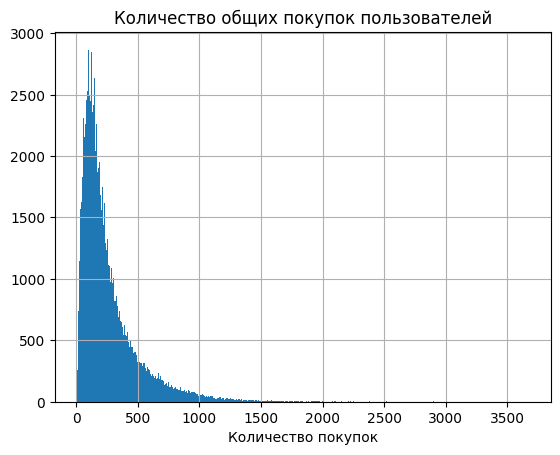

In [71]:
data_user_group.n_buy_full.hist(bins=500)
plt.title('Количество общих покупок пользователей')
plt.xlabel('Количество покупок')
plt.show()

In [31]:
# конечная таблица для породуктов
print(data_product_group.shape)
data_product_group.head()

(49465, 2)


,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702


In [99]:
data_product_group.n_sold_full.median()

46.0

In [100]:
sum(data_product_group.n_sold_full.values <= 100), sum(data_product_group.n_sold_full.values > 46)

(31729, 24702)

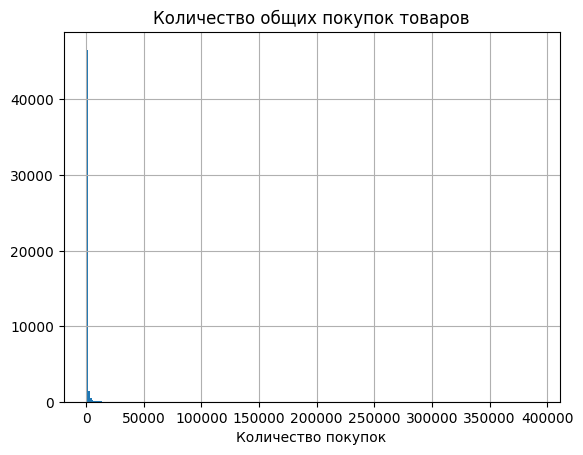

In [72]:
data_product_group.n_sold_full.hist(bins=250)
plt.title('Количество общих покупок товаров')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
top_10_products = data_product_group.product_id.values[:10]
top_10_products

array([24852, 13176, 21137, 21903, 47209, 47766, 47626, 27845, 27966,
       26209])

In [ ]:
# конечная суммарная таблица
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 5)


,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554


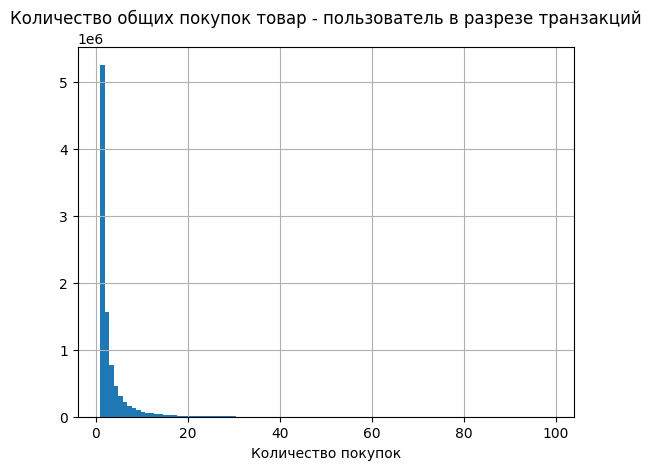

In [106]:
data_merge_group.n_sold.hist(bins=100)
plt.title('Количество общих покупок товар - пользователь в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

In [50]:
data_merge_group.n_buy_full.median()

299.0

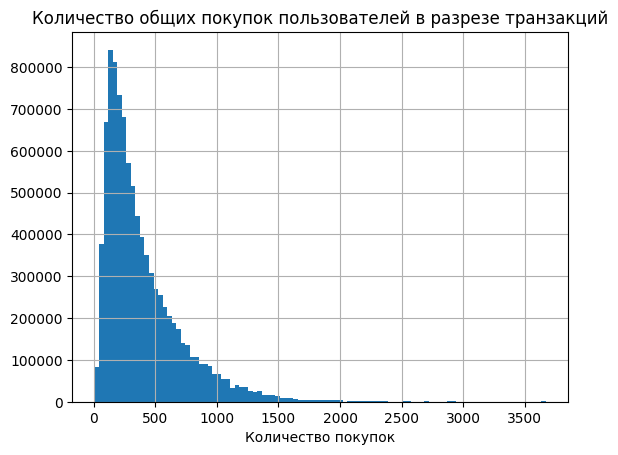

In [103]:
data_merge_group.n_buy_full.hist(bins=100)
plt.title('Количество общих покупок пользователей в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

In [51]:
data_merge_group.n_sold_full.median()

3441.0

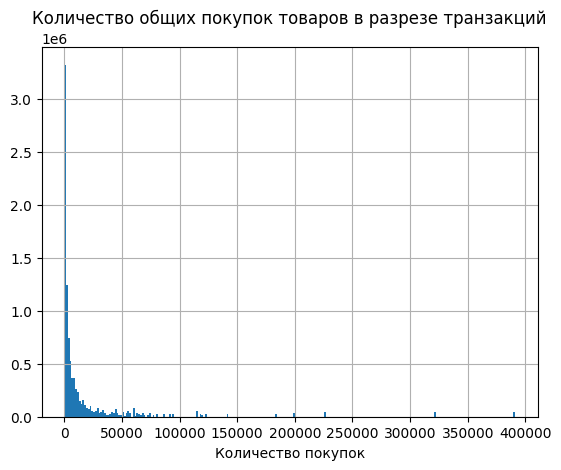

In [105]:
data_merge_group.n_sold_full.hist(bins=250)
plt.title('Количество общих покупок товаров в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

## Топ 10 продуктов для каждого пользователя

In [101]:
#топ-10 продуктов для каждого пользователя
def define_top_10_per_user(data_merge_group, add_from_top10=False):
  """Определение для каждого пользователя топ 10 продуктов
  Вход:
    data_merge_group (pandas.core.frame.DataFrame): исходная таблица
    add_from_top10 (bool, optional): если пользователь купил меньше 10 продуктов в сумме, то добавлять из топ10 оставшиесы или нет
  """
  data_merge_group_ = data_merge_group.sort_values(by=['user_id', 'n_sold'], ascending=[True, False])
  top_10_products_per_user = data_merge_group_.groupby('user_id').head(10)
  top_10_products_per_user = top_10_products_per_user.groupby('user_id')['product_id'].apply(list).reset_index(name='top_products')
  if add_from_top10:
    top_10_products_per_user['top_products'] = top_10_products_per_user.top_products.apply(lambda x: x + list(top_10_products[:10-len(x)]))
  top_10_products_per_user['product_id'] = top_10_products_per_user.top_products.apply(lambda x: ' '.join(map(str, x)))
  return top_10_products_per_user

In [102]:
%%time
top_10_products_per_user = define_top_10_per_user(data_merge_group)
top_10_products_per_user.head()

CPU times: user 6.69 s, sys: 1.29 s, total: 7.98 s
Wall time: 8.08 s


,user_id,top_products,product_id
0,1,"[196, 12427, 10258, 25133, 13032, 46149, 13176...",196 12427 10258 25133 13032 46149 13176 49235 ...
1,2,"[32792, 47209, 24852, 19156, 18523, 1559, 3375...",32792 47209 24852 19156 18523 1559 33754 12000...
2,3,"[39190, 47766, 21903, 9387, 17668, 43961, 1679...",39190 47766 21903 9387 17668 43961 16797 22035...
3,7,"[40852, 37602, 17638, 21137, 31683, 13198, 492...",40852 37602 17638 21137 31683 13198 4920 30391...
4,13,"[27086, 4210, 27435, 1689, 33735, 43086, 5652,...",27086 4210 27435 1689 33735 43086 5652 25134 4...


In [ ]:
top_10_products_per_user[top_10_products_per_user.user_id == 20121]

,user_id,top_products,product_id
9725,20121,[17426],17426


In [ ]:
top_10_products_per_user[['user_id', 'product_id']].to_csv('sample_submission.csv', index=False)

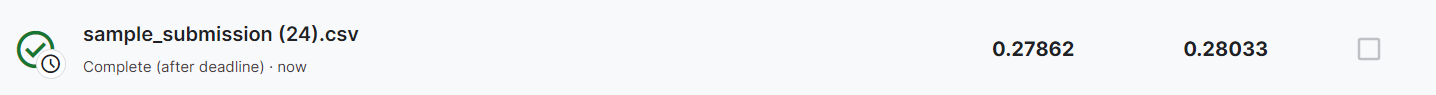

In [ ]:
top_10_products_per_user = define_top_10_per_user(data_merge_group, add_from_top10=True)
top_10_products_per_user.head()

In [ ]:
top_10_products_per_user[top_10_products_per_user.user_id == 20121]

In [ ]:
top_10_products_per_user[['user_id', 'product_id']].to_csv('sample_submission.csv', index=False)

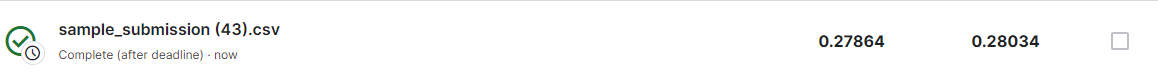

## формирование обучающих данных

In [ ]:
n_delete_min = 0
n_delete_max = 1e10
mode_prepare = 'delete' # replace / delete
column = 'n_sold' # n_sold / n_sold_full

In [ ]:
data_merge_group.shape, data_merge_group.user_id.nunique(), data_merge_group.product_id.nunique()

((9459065, 5), 100000, 49465)

In [ ]:
def prepare_dataset(data_merge_group, n_delete_min, n_delete_max, mode_prepare, column):
  """Подготовка датасета
  Вход:
    data_merge_group (pandas.core.frame.DataFrame): исходная таблица до замены / удаления
    n_delete_min (int): все что меньше будет удалено / заменено
    n_delete_max (int): все что выше будет удалено / заменено
    mode_prepare (str): какой режим: удаление / замена
      replace - заменяем id продуктов, где покупок меньше n_delete_min, на 0
      delete - удаляем данные где покупок меньше n_delete_min и больше n_delete_max для пользователя-продукта
    column (str): колонка относительно которой происходит удаление / замена
      n_sold - количество покупок в паре пользователь - продукт
      n_sold_full - общее количество покупок для каждого продутка
  Выход
    data_merge_group_new_1 (pandas.core.frame.DataFrame): итоговая таблица после замены / удаления
  """

  if mode_prepare == 'replace':
    data_merge_group_new_1 = data_merge_group.copy()
    data_merge_group_new_1.product_id.loc[data_merge_group_new_1[data_merge_group_new_1[column] <= n_delete_min].index] = 0

  if mode_prepare == 'delete':
    data_merge_group_new_1 = data_merge_group[(data_merge_group[column] > n_delete_min) & (data_merge_group[column] < n_delete_max)]

  return data_merge_group_new_1

In [ ]:
data_merge_group_new_1 = prepare_dataset(data_merge_group, n_delete_min, n_delete_max, mode_prepare, column)
print(data_merge_group_new_1.shape, data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique())
data_merge_group_new_1.tail()

(9459065, 5) 100000 49465


,user_id,product_id,n_sold,n_sold_full,n_buy_full
9459060,66955,25059,1,223,18
9459061,66955,2944,11,72,18
9459062,66955,48422,4,16,18
9459063,66955,4026,2,10,18
9459064,20121,17426,10,478,10


# Коллаборативная фильтрация

## формирование coo_matrix





In [ ]:
from scipy.sparse import csr_matrix, coo_matrix

In [ ]:
weight = True
weight_column = 'n_sold'

In [ ]:
def prepare_coo_matrix_for_collaborative_filtering(data_merge_group_new_1, weight, weight_column=None):
  """Подготовка признаков для коллаборативной фильтрации
  Вход:
    data_merge_group_new_1 (pandas.core.frame.DataFrame): исходная таблица
    weight (bool): веса взвешенные или нет
    weight_column (str, optional): колонка на основе чего строится разряженная матрица
      n_sold - на основе кол-ва продаж user-product
      n_sold_full - на основе общих кол-ва продаж
  Выход:
    sparse_user_item (scipy.sparse._csr.csr_matrix): разряженная матрица признаков
  """

  users_inv_mapping = dict(enumerate(data_merge_group_new_1['user_id'].unique()))
  users_mapping = {v: k for k, v in users_inv_mapping.items()}
  print(f'len(users_mapping) = {len(users_mapping)}')
  items_inv_mapping = dict(enumerate(data_merge_group_new_1['product_id'].unique()))
  items_mapping = {v: k for k, v in items_inv_mapping.items()}
  print(f'len(items_mapping) = {len(items_mapping)}')
  row = data_merge_group_new_1['user_id'].map(users_mapping.get)
  col = data_merge_group_new_1['product_id'].map(items_mapping.get)
  if not weight:
    data = np.ones(data_merge_group_new_1.shape[0])
  else:
    data =  data_merge_group_new_1[weight_column].tolist()
  coo = coo_matrix((data, (row, col)),)
  sparse_user_item = coo.tocsr()
  return sparse_user_item, users_inv_mapping, users_mapping, items_inv_mapping, items_mapping

In [ ]:
sparse_user_item, users_inv_mapping, users_mapping, items_inv_mapping, items_mapping = prepare_coo_matrix_for_collaborative_filtering(
    data_merge_group_new_1,
    weight,
    weight_column)
sparse_user_item

len(users_mapping) = 24331
len(items_mapping) = 9652


<24331x9652 sparse matrix of type '<class 'numpy.int64'>'
	with 98648 stored elements in Compressed Sparse Row format>

## обучение

In [ ]:
pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 25.9 MB/s eta 0:00:00


In [ ]:
from implicit.nearest_neighbours import ItemItemRecommender, CosineRecommender, TFIDFRecommender, BM25Recommender
from implicit.als import AlternatingLeastSquares

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
show_progress=True

factors=500
iterations=3
regularization=0.01
num_threads=4
random_state=42

In [ ]:
def train_collaborative_filtering(
    sparse_user_item,
    show_progress,
    factors,
    iterations,
    regularization,
    num_threads,
    random_state
):
  """ Обучение
  Вход:
    sparse_user_item (scipy.sparse._csr.csr_matrix): разряженная матрица признаков
    show_progress(bool): Whether to show a progress bar during fitting
    factors (int): The number of latent factors to compute
    iterations  (int): The number of ALS iterations to use when fitting data
    regularization (float): The regularization factor to use
    num_threads (int): The number of threads to use for fitting the model and batch recommend calls.
    random_state (int): The random state for seeding the initial item and user factors.
  Выход:
    model (implicit.cpu.als.AlternatingLeastSquares): модель
  """

  model = AlternatingLeastSquares(
      factors=factors,
      iterations=iterations,
      regularization=regularization,
      num_threads=num_threads,
      random_state=random_state
    )
  model.fit(sparse_user_item,
            show_progress=show_progress)
  return model

In [ ]:
model_col_fil = train_collaborative_filtering(sparse_user_item, show_progress, factors, iterations, regularization, num_threads, random_state)

  0%|          | 0/3 [00:00<?, ?it/s]

## инференс

In [ ]:
mode_inference = 'top_10_per_user'

In [ ]:
def inference_collaborative_filtering(
    K,
    model,
    inference_all,
    userids=None,
    mode_prepare='delete',
    mode_inference='top_10_per_user'
):
  """ Инференс
  Вход:
    K (int): количество предсказаний
    model (implicit.cpu.als.AlternatingLeastSquares): модель
    inference_all (bool): делать ли рекоммендации для всех пользователей
    userids (list, optional): реальные id пользователя для которого делать предсказаниеm, если inference_all=False
    mode_prepare (str, optional): какой режим: удаление / замена
    mode_inference (str, optional): что добавлять в недостающие айдишники
      top_10_for_all_products - добавление недостающих айдишников и присваивание им топ10 продуктов из всех
      top_10_per_user - добавление недостающих айдишников и присваивание им топ10 продуктов, которые они покупали,
      если купленных товаров меньше 10, то добавляются самые популярные
  Выход:
    data_res (pandas.core.frame.DataFrame): таблица user_id - product_id
  """

  if inference_all:
    all_users = data_merge_group.user_id.unique() # реальные айдишники все
    userids = list(users_mapping.values()) # нереальные айдишники которые были в обучающей выборке
  else:
    all_users = userids # реальные айдишники все
    userids = [users_mapping.get(userid, '') for userid in userids] # нереальные айдишники которые были в обучающей выборке

  user_id = [users_inv_mapping.get(userid, '') for userid in userids if userid != ''] # реальные айдишники которые были в обучающей выборке
  product_id = []
  for userid in tqdm(userids):
    if userid != '':
      recs = model.recommend(userid=userid,
                            user_items=sparse_user_item,
                            N=K,
                            filter_already_liked_items=False,
                            filter_items=[items_mapping[0]] if mode_prepare=='replace' else None,
                            # recalculate_user=True
                            )
      res_ids = [items_inv_mapping[item_id] for item_id in recs[0]]
      product_id.append(' '.join(map(str, res_ids)))

  # добавление недостающих айдишников
  for element in all_users:
    if element not in user_id:
      user_id.append(element)
      if mode_inference == 'top_10_per_user':
        top_10_products_per_user_ = top_10_products_per_user[top_10_products_per_user.user_id == element].top_products.values[0]
        top_10_products_per_user_ = top_10_products_per_user_ + list(top_10_products[:10-len(top_10_products_per_user_)])
      elif mode_inference == 'top_10_for_all_products':
        top_10_products_per_user_ = top_10_products
      product_id.append(' '.join(map(str, top_10_products_per_user_)))
  data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
  return data_res

In [ ]:
data_res = inference_collaborative_filtering(K=10,
                                             model=model_col_fil,
                                             inference_all=False,
                                             userids=[41356, 20121, 169740])
data_res

100%|██████████| 3/3 [00:00<00:00, 1084.45it/s]


,user_id,product_id
0,41356,38689 26209 40910 14366 11187 41950 8277 8518 ...
1,20121,17426 24852 13176 21137 21903 47209 47766 4762...
2,169740,35894 33493 13948 36051 19343 500 24852 13176 ...


In [ ]:
data_res = inference_collaborative_filtering(K=10,
                                             model=model_col_fil,
                                             inference_all=True)
data_res

100%|██████████| 24331/24331 [01:20<00:00, 303.70it/s]


,user_id,product_id
0,41356,38689 26209 40910 14366 11187 41950 8277 8518 ...
1,175658,19677 24010 6583 25387 37208 24338 8264 13380 ...
2,50679,46676 47626 25718 8277 24852 45066 45223 15902...
3,100330,2677 39475 45636 17487 25718 5161 3957 19006 3...
4,197799,24852 29370 6583 25718 25387 28058 16083 38652...
...,...,...
99995,72383,44389 24852 13176 21137 21903 47209 47766 4762...
99996,116989,31860 36051 48532 45683 24852 13176 21137 2190...
99997,169740,35894 33493 13948 36051 19343 500 24852 13176 ...
99998,66955,2944 48422 4026 25059 24852 13176 21137 21903 ...


In [ ]:
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,41356,38689 26209 40910 14366 11187 41950 8277 8518 ...
1,175658,19677 24010 6583 25387 37208 24338 8264 13380 ...
2,50679,46676 47626 25718 8277 24852 45066 45223 15902...
3,100330,2677 39475 45636 17487 25718 5161 3957 19006 3...
4,197799,24852 29370 6583 25718 25387 28058 16083 38652...


In [ ]:
data_res.tail()

,user_id,product_id
99995,72383,44389 24852 13176 21137 21903 47209 47766 4762...
99996,116989,31860 36051 48532 45683 24852 13176 21137 2190...
99997,169740,35894 33493 13948 36051 19343 500 24852 13176 ...
99998,66955,2944 48422 4026 25059 24852 13176 21137 21903 ...
99999,20121,17426 24852 13176 21137 21903 47209 47766 4762...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554
5,41356,24852,52,391170,1554
6,41356,38689,82,30761,1554
7,41356,11187,93,892,1554
8,41356,13176,36,321553,1554
9,41356,44632,5,62563,1554


# LightFM

In [ ]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808330 sha256=296fe95d99172d564c17426cbf565f10880e0471c4d500cd76dcb635b7d0eae1
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
from lightfm.data import Dataset
from lightfm import LightFM

import nltk
import string
from gensim.models import FastText
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

## формирование признаков

In [ ]:
products_features_digit = ['n_sold_full'] # 'n_sold_full'
products_features_text = [] # 'product_name',	'aisle',	'department'
products_features = products_features_digit + [f'{products_feature_text}_vec' for products_feature_text in products_features_text]
# products_features = products_features_digit + products_features_text

users_features_digit = ['n_buy_full'] # 'n_buy_full'
users_features_text = [] # 'order_dow',	'order_hour_of_day' , 'days_since_prior_order',
users_features = users_features_digit + [f'{users_feature_text}_vec' for users_feature_text in users_features_text]

products_features, users_features

(['n_sold_full'], ['n_buy_full'])

In [ ]:
def generate_feature_list(dataframe, features_name):
    # features = dataframe[features_name].apply(
    #     lambda x: ','.join(x.map(str)), axis=1)
    # features = features.str.split(',')
    # если числовой признак:
    # features = features.apply(lambda x: [int(feature) if feature.isdigit() else feature for feature in x])

    features = dataframe[features_name].apply(lambda row: list(row), axis=1)
    features = features.apply(pd.Series).stack().reset_index(drop=True)
    return features

def create_features(dataframe, features_name, id_col_name):
    # features = dataframe[features_name].apply(
    #     lambda x: ','.join(x.map(str)), axis=1)
    # features = features.str.split(',')
    # # если числовой признак:
    # features = features.apply(lambda x: [int(feature) if feature.isdigit() else feature for feature in x])

    features = dataframe[features_name].apply(lambda row: list(row), axis=1)
    features = list(zip(dataframe[id_col_name], features))
    return features

def tokenize_text(raw_text):
    """Функция для токенизации текста
    Вход:
      raw_text (str): исходная текстовая строка
    Выход:
      tokens (list): список токенов
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if (i not in string.punctuation)]
    return tokens

def prepare_features_for_lightFM(data_products,
                                 data_transactions,
                                 products_features,
                                 users_features,
                                 products_features_text,
                                 users_features_text):
  """ подготовка признаков
  Вход:
    data_products (pandas.core.frame.DataFrame): исходная таблица с продуктами
    data_transactions (pandas.core.frame.DataFrame): исходная таблица с транзакциями
    products_features (list): список всех признаков продуктов
    users_features (list): список всех признаков пользователей
    products_features_text (list): список текстовых признаков продуктов
    users_features_text (list): список текстовых признаков пользователей
  Выход:
    data_res (pandas.core.frame.DataFrame): таблица user_id - product_id
  """

  data_products = data_products.merge(data_product_group, left_on='product_id', right_on='product_id', how='outer')
  if 'n_sold_full' in data_products.columns:
    data_products.n_sold_full = data_products.n_sold_full.fillna(value=0)
    data_products.n_sold_full = data_products.n_sold_full.astype(int)
  data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day', 'days_since_prior_order'].median().reset_index()
  data_users = data_users.merge(data_user_group, left_on='user_id', right_on='user_id', how='outer')

  # векторизация текстовых признаков - продукты
  for feature in products_features_text:
    text_tok = data_products[f'{feature}'].apply(tokenize_text).values
    data_products[f'{feature}_tok'] = text_tok
    texts = data_products[f'{feature}_tok'].values
    ft = FastText(sentences=texts, vector_size=16, min_count=1, epochs=10)
    data_products[f'{feature}_vec'] = data_products[f'{feature}_tok'].apply(lambda x: tuple(ft.wv[x][0]))
  print(f'')

  # векторизация текстовых признаков - пользователи
  for feature in users_features_text:
    text_tok = data_users[f'{feature}'].apply(tokenize_text).values
    data_users[f'{feature}_tok'] = text_tok
    texts = data_users[f'{feature}_tok'].values
    ft = FastText(sentences=texts, vector_size=16, min_count=1, epochs=10)
    # ft.wv.most_similar('snacks')
    data_users[f'{feature}_vec'] = data_users[f'{feature}_tok'].apply(lambda x: tuple(ft.wv[x][0]))

  dataset = Dataset()
  dataset.fit(
      set(data_transactions['user_id']),
      set(data_products['product_id']))

  if products_features:
    products_feature_list = generate_feature_list(
        data_products,
        products_features
        )
    print(f'products_feature_list = {products_feature_list}')
    data_products['products_features'] = create_features(
        data_products,
        products_features,
        'product_id')
    dataset.fit_partial(
      item_features=products_feature_list)

  if users_features:
    users_feature_list = generate_feature_list(
        data_users,
        users_features)
    data_users['user_features'] = create_features(
      data_users,
      users_features,
      'user_id')
    dataset.fit_partial(
      user_features=users_feature_list)

  return dataset, data_products, data_users

In [ ]:
dataset, data_products, data_users = prepare_features_for_lightFM(
    data_products,
    data_transactions,
    products_features,
    users_features,
    products_features_text,
    users_features_text
)

<ipython-input-30-0618a5bd30fc>:56: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day', 'days_since_prior_order'].median().reset_index()



products_feature_list = 0        1549
1          80
2         242
3         215
4          11
         ... 
49683       5
49684      36
49685     111
49686       9
49687      55
Length: 49688, dtype: int64


In [ ]:
print(data_products.shape)
data_products.head()

(49688, 8)


,product_id,product_name,aisle_id,department_id,aisle,department,n_sold_full,products_features
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1549,"(1, [1549])"
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,80,"(2, [80])"
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,242,"(3, [242])"
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,215,"(4, [215])"
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,11,"(5, [11])"


In [ ]:
data_products.department.nunique(), data_products.aisle.nunique(), data_products.product_name.nunique(),

(21, 134, 49688)

In [ ]:
print(data_users.shape)
data_users.head()

(100000, 6)


,user_id,order_dow,order_hour_of_day,days_since_prior_order,n_buy_full,user_features
0,1,3.0,9.0,20.5,59,"(1, [59])"
1,2,2.0,10.0,13.0,195,"(2, [195])"
2,3,0.0,16.0,9.0,82,"(3, [82])"
3,7,1.0,13.0,9.0,206,"(7, [206])"
4,13,6.0,14.0,7.0,81,"(13, [81])"


## формирование coo_matrix





In [ ]:
weight = False
weight_column = 'n_sold'

In [ ]:
def prepare_coo_matrix_for_lightFM(dataset, data_merge_group_new_1, data_users, data_products, weight, weight_column=None):
  """Подготовка признаков для коллаборативной фильтрации
  Вход:
    dataset
    data_merge_group_new_1 (pandas.core.frame.DataFrame): исходная таблица
    data_users (pandas.core.frame.DataFrame): таблица с признаками пользователей
    data_products (pandas.core.frame.DataFrame): таблица с признаками продуктов
    weight (bool): веса взвешенные или нет
    weight_column (str, optional): колонка на основе чего строится разряженная матрица
      n_sold - на основе кол-ва продаж user-product
      n_sold_full - на основе общих кол-ва продаж
  Выход:
    sparse_user_item (scipy.sparse._csr.csr_matrix): разряженная матрица признаков
  """

  lightfm_mapping = dataset.mapping()
  lightfm_mapping = {
      'users_mapping': lightfm_mapping[0],
      'user_features_mapping': lightfm_mapping[1],
      'items_mapping': lightfm_mapping[2],
      'item_features_mapping': lightfm_mapping[3],
  }
  lightfm_mapping['users_inv_mapping'] = {v: k for k, v in lightfm_mapping['users_mapping'].items()}
  lightfm_mapping['items_inv_mapping'] = {v: k for k, v in lightfm_mapping['items_mapping'].items()}

  if not weight:
    # без учета весов
    data_merge_group_new_1['user_product_id_tuple'] = list(zip(
        data_merge_group_new_1.user_id,
        data_merge_group_new_1.product_id))
  else:
    # с учетом весов
    # calculate our weight value
    # data_merge_group_new_1['total_weights'] = (data_merge_group_new_1[weight_column]) / (
    #     data_merge_group_new_1[weight_column].max())
    # data_merge_group_new_1['total_weights'] = 1 / (data_merge_group_new_1[weight_column])
    data_merge_group_new_1['total_weights'] = data_merge_group_new_1[weight_column]
    data_merge_group_new_1['user_product_id_tuple'] = list(zip(
        data_merge_group_new_1.user_id,
        data_merge_group_new_1.product_id,
        data_merge_group_new_1.total_weights))

  interactions, weights = dataset.build_interactions(
    data_merge_group_new_1['user_product_id_tuple'])
  if 'user_features' in data_users.columns:
    user_features = dataset.build_user_features(
        data_users['user_features'])
    print(f'user_features.shape = {user_features.shape}')
  else:
    user_features = None
  if 'products_features' in data_products.columns:
    products_features = dataset.build_item_features(
        data_products['products_features'])
    print(f'products_features.shape = {products_features.shape}')
  else:
    products_features = None
  return interactions, weights, user_features, products_features, lightfm_mapping

In [ ]:
interactions, weights, user_features, products_features, lightfm_mapping = prepare_coo_matrix_for_lightFM(
    dataset,
    data_merge_group_new_1,
    data_users,
    data_products,
    weight,
    weight_column)

user_features.shape = (100000, 100888)
products_features.shape = (49688, 49733)


In [ ]:
interactions, weights

(<100000x49688 sparse matrix of type '<class 'numpy.int32'>'
 	with 9459065 stored elements in COOrdinate format>,
 <100000x49688 sparse matrix of type '<class 'numpy.float32'>'
 	with 9459065 stored elements in COOrdinate format>)

In [ ]:
  print(data_merge_group_new_1.shape)
  data_merge_group_new_1.head()

(9459065, 6)


,user_id,product_id,n_sold,n_sold_full,n_buy_full,user_product_id_tuple
0,41356,6583,99,697,1554,"(41356, 6583)"
1,41356,14366,99,1473,1554,"(41356, 14366)"
2,41356,38652,99,598,1554,"(41356, 38652)"
3,41356,29671,98,527,1554,"(41356, 29671)"
4,41356,28204,3,74184,1554,"(41356, 28204)"


## обучение

In [ ]:
epochs=100
num_threads=4
verbose=True

no_components=256
learning_rate=0.05
loss='warp'
random_state=42
item_alpha=1e-09
user_alpha=1e-09

In [ ]:
def train_lightFM(
    interactions,
    products_features,
    user_features,
    weights,
    epochs,
    num_threads,
    verbose,
    no_components,
    learning_rate,
    loss,
    random_state,
    item_alpha,
):
  """ Обучение
  Вход:
    interactions (np.float32 coo_matrix of shape [n_users, n_items]): the matrix containing user-item interactions. Will be converted to numpy.float32 dtype if it is not of that type
    products_features (np.float32 csr_matrix of shape [n_items, n_item_features]): Each row contains that item’s weights over features
    user_features (np.float32 csr_matrix of shape [n_users, n_user_features]): Each row contains that user’s weights over features.
    weights ()
    epochs (int): number of epochs to run
    num_threads  (int): Number of parallel computation threads to use. Should not be higher than the number of physical cores.
    verbose (bool): whether to print progress messages. If tqdm is installed, a progress bar will be displayed instead
    no_components (int): the dimensionality of the feature latent embeddings.
    learning_rate (float): initial learning rate for the adagrad learning schedule.
    loss (string): one of (‘logistic’, ‘bpr’, ‘warp’, ‘warp-kos’): the loss function
    random_state(int): The seed of the pseudo random number generator to use when shuffling the data and initializing the parameters.
    item_alpha (float): L2 penalty on item features. Tip: setting this number too high can slow down training. One good way to check is if the final weights in the embeddings turned out to be mostly zero. The same idea applies to the user_alpha parameter
  Выход:
    model (lightfm.lightfm.LightFM): модель
  """

  model = LightFM(
      no_components=no_components,
      learning_rate=learning_rate,
      loss=loss,
      random_state=random_state,
      item_alpha=item_alpha,
      )
  model.fit(
      interactions,
      item_features=products_features,
      user_features=user_features,
      sample_weight=weights,
      epochs=epochs,
      num_threads=num_threads,
      verbose=verbose,
  )
  return model

In [ ]:
model_lightFM = train_lightFM(
    interactions,
    products_features,
    user_features,
    weights,
    epochs,
    num_threads,
    verbose,
    no_components,
    learning_rate,
    loss,
    random_state,
    item_alpha,
)

Epoch: 100%|██████████| 100/100 [3:32:20<00:00, 127.40s/it]


In [ ]:
# from lightfm.evaluation import auc_score
# # Compute and print the AUC score
# train_auc = auc_score(model, interactions, num_threads=4).mean()
# train_auc
# model.item_biases *= 0.0
# train_auc = auc_score(model, interactions, num_threads=4).mean()
# train_auc

## инференс

In [ ]:
def inference_lightFM(
    K,
    model,
    inference_all,
    userids=None,
    mode_prepare='replace',
    coo_matrix_from_col_fil=False
):
  """ Инференс
  Вход:
    K (int): количество предсказаний
    model (lightfm.lightfm.LightFM): модель
    inference_all (bool): делать ли рекоммендации для всех пользователей
    userids (list, optional): реальные id пользователя для которого делать предсказаниеm, если inference_all=False
    lightfm_mapping (dict): словарь мэпингов
    mode_prepare (str, optional): какой режим: удаление / замена
    coo_matrix_from_col_fil (bool, optional)
  Выход:
    data_res (pandas.core.frame.DataFrame): таблица user_id - product_id
  """

  if coo_matrix_from_col_fil: # недоработано
    item_ids=list(items_mapping.values())
    item_ids_dict_inv = items_inv_mapping
    if inference_all:
      userids = users_mapping.values()
    user_id = [users_inv_mapping[userid] for userid in userids]
    # user_id = users_mapping.keys()
  else:
    item_ids=list(lightfm_mapping['items_mapping'].values())
    item_ids_dict_inv = lightfm_mapping['items_inv_mapping']
    if inference_all:
      userids = lightfm_mapping['users_mapping'].values() # нереальные
    else:
      userids = [lightfm_mapping['users_mapping'][userid] for userid in userids] # нереальные
    user_id = [lightfm_mapping['users_inv_mapping'][userid] for userid in userids] # реальные
    # user_id = lightfm_mapping['users_mapping'].keys()

  if coo_matrix_from_col_fil and mode_prepare=='replace':
    K += 1
  res = []
  for userid in tqdm(userids):
    scores = model.predict(
            user_ids=userid,
            item_ids=item_ids,
            item_features=products_features,
            user_features=user_features,
            num_threads=4)
    ids = np.argpartition(scores, -np.arange(K))[-K:][::-1]
    res_ids = [item_ids_dict_inv[ids_] for ids_ in ids]
    product_id = ' '.join(map(str, res_ids))
    res.append(product_id)
    if coo_matrix_from_col_fil and mode_prepare=='replace':
      res_ids.remove(0) if 0 in res_ids else res_ids[:-1]
  product_id = res
  data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
  return data_res

In [ ]:
data_res = inference_lightFM(K=10,
                             model=model_lightFM,
                             inference_all=False,
                             userids=[1, 7])
data_res

100%|██████████| 2/2 [00:00<00:00, 13.70it/s]


,user_id,product_id
0,1,13176 12341 42265 25133 196 30450 16797 39657 ...
1,7,21137 37999 31343 33731 8277 24852 13176 21903...


In [ ]:
data_res = inference_lightFM(K=10,
                             model=model_lightFM,
                             inference_all=True)
data_res

100%|██████████| 100000/100000 [2:05:43<00:00, 13.26it/s]


,user_id,product_id
0,1,13176 12341 42265 25133 196 30450 16797 39657 ...
1,2,4957 33787 22124 29941 13819 18523 33754 24954...
2,3,24852 42265 25890 7503 47144 43961 16797 30450...
3,7,21137 37999 31343 33731 8277 24852 13176 21903...
4,13,6184 30406 17634 30305 16797 43352 39275 17794...
...,...,...
99995,206202,16797 21903 42585 26620 32828 24852 46906 2994...
99996,206206,14129 39228 18531 39812 42701 24964 27744 4166...
99997,206207,4605 21903 24852 1025 26209 30489 21137 24964 ...
99998,206208,47672 45007 9020 22035 22935 34126 32655 17949...


In [ ]:
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,1,13176 12341 42265 25133 196 30450 16797 39657 ...
1,2,4957 33787 22124 29941 13819 18523 33754 24954...
2,3,24852 42265 25890 7503 47144 43961 16797 30450...
3,7,21137 37999 31343 33731 8277 24852 13176 21903...
4,13,6184 30406 17634 30305 16797 43352 39275 17794...


In [ ]:
data_res.tail()

,user_id,product_id
99995,206202,16797 21903 42585 26620 32828 24852 46906 2994...
99996,206206,14129 39228 18531 39812 42701 24964 27744 4166...
99997,206207,4605 21903 24852 1025 26209 30489 21137 24964 ...
99998,206208,47672 45007 9020 22035 22935 34126 32655 17949...
99999,206209,44142 34969 5612 24852 16168 28156 29487 5077 ...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554
5,41356,24852,52,391170,1554
6,41356,38689,82,30761,1554
7,41356,11187,93,892,1554
8,41356,13176,36,321553,1554
9,41356,44632,5,62563,1554


In [ ]:
data_product_group.head(10)

,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702
47555,47766,141632
47417,47626,122080
27728,27845,118954
27849,27966,118073
26099,26209,115506


# Результаты

## сравнение

In [2]:
import matplotlib.pyplot as plt

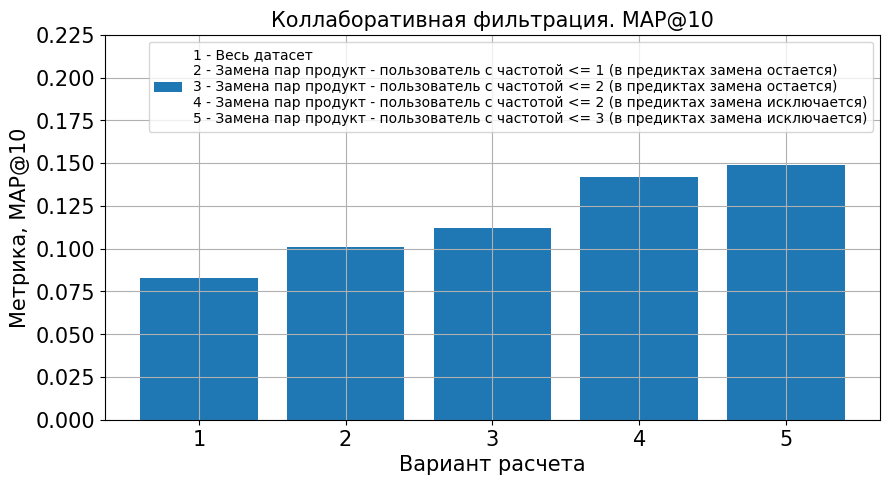

In [84]:
results = [0.0827, 0.101, 0.112, 0.142, 0.149,]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Коллаборативная фильтрация. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Весь датасет\n\
2 - Замена пар продукт - пользователь с частотой <= 1 (в предиктах замена остается)\n\
3 - Замена пар продукт - пользователь с частотой <= 2 (в предиктах замена остается)\n\
4 - Замена пар продукт - пользователь с частотой <= 2 (в предиктах замена исключается)\n\
5 - Замена пар продукт - пользователь с частотой <= 3 (в предиктах замена исключается)'],
           fontsize = 10)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.225])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

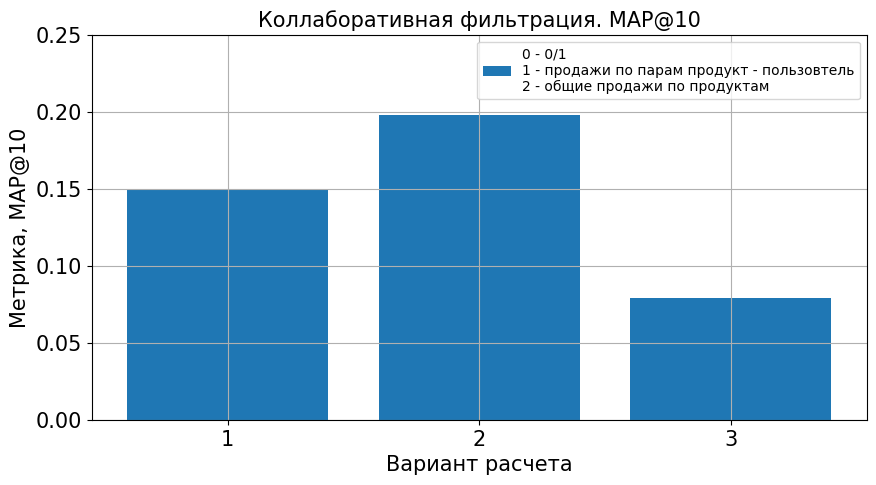

In [85]:
results = [0.149, 0.198, 0.079]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Коллаборативная фильтрация. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'0 - 0/1\n\
1 - продажи по парам продукт - пользовтель\n\
2 - общие продажи по продуктам'])
plt.yticks(fontsize = 15)
plt.ylim([0, 0.25])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

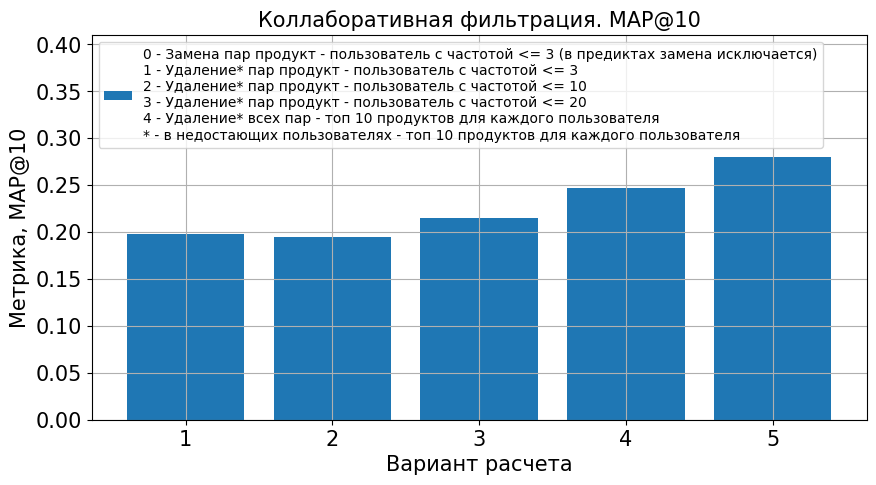

In [88]:
results = [0.198, 0.195, 0.215, 0.247, 0.28]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Коллаборативная фильтрация. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'0 - Замена пар продукт - пользователь с частотой <= 3 (в предиктах замена исключается)\n\
1 - Удаление* пар продукт - пользователь с частотой <= 3\n\
2 - Удаление* пар продукт - пользователь с частотой <= 10\n\
3 - Удаление* пар продукт - пользователь с частотой <= 20\n\
4 - Удаление* всех пар - топ 10 продуктов для каждого пользователя\n\
* - в недостающих пользователях - топ 10 продуктов для каждого пользователя'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.41])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

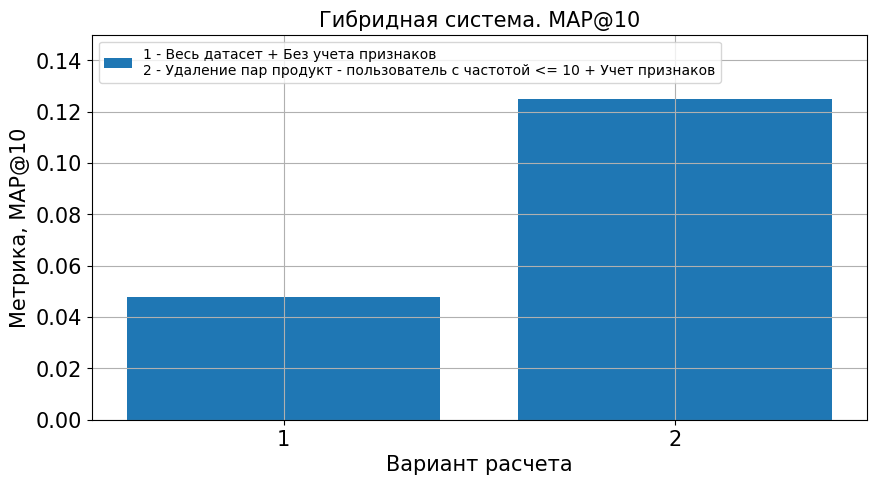

In [90]:
results = [0.048, 0.125]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Гибридная система. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Весь датасет + Без учета признаков\n\
2 - Удаление пар продукт - пользователь с частотой <= 10 + Учет признаков'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.15])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()


# 0,048 - без учета признаков, ничего, 10
# 0,061 - без учета признаков, ничего, 10
# 0,064 - признак, ничего, 100
# 0,124 - без учета признаков, меньше 10
# 0,125 - признак, меньше 10, 200

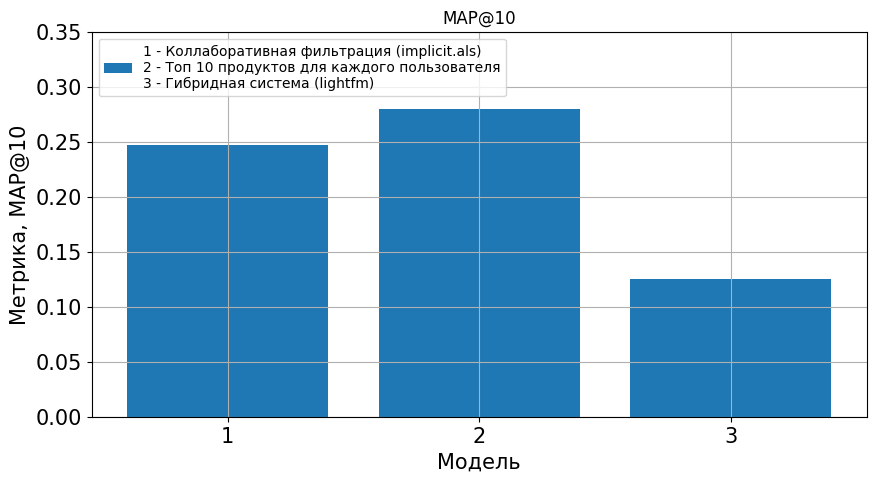

In [94]:
results = [0.247, 0.28, 0.125]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('MAP@10')
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Коллаборативная фильтрация (implicit.als)\n\
2 - Топ 10 продуктов для каждого пользователя\n\
3 - Гибридная система (lightfm)'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.35])
plt.xlabel('Модель', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

## Коллаборативная фильтрация

In [ ]:
ItemItemRecommender

csr

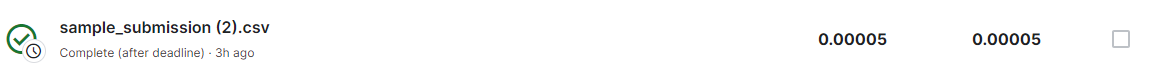

In [ ]:
AlternatingLeastSquares

factors=200
iterations=15
regularization=0.01

coo

ничего не заменяется / не удаляется

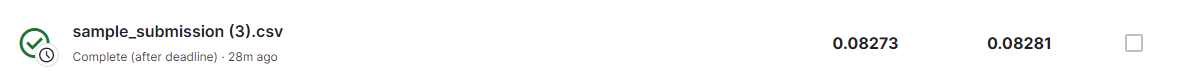

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где меньше 1 (остается в предиктах 0)

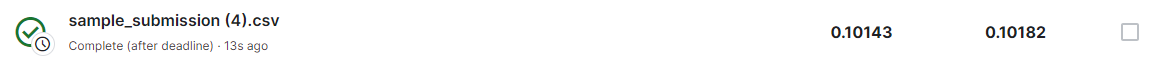

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где меньше 2 (остается в предиктах 0)

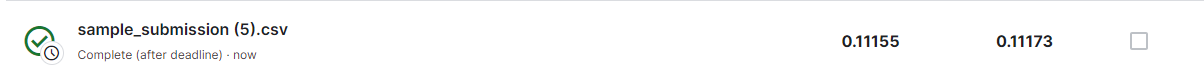

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где меньше 2 (не остается в предиктах 0)

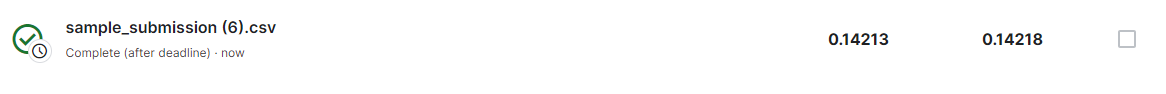

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где меньше 3 (не остается в предиктах 0)

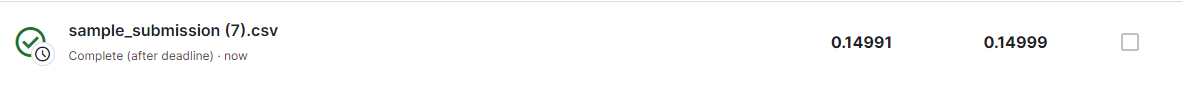

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo

заменяются везде где меньше 3 (не остается в предиктах 0)

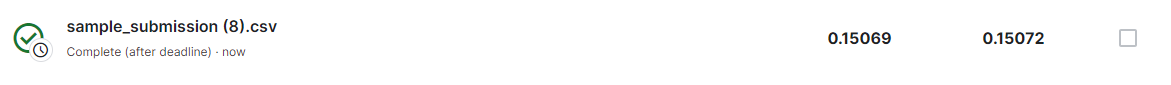

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

заменяются везде где меньше 3 (не остается в предиктах 0)

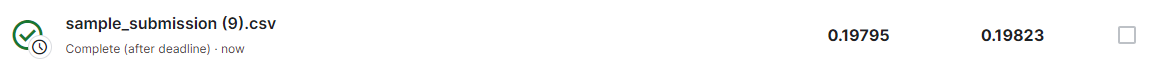

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo (на основе кол-ва продаж)

заменяются везде где меньше 3 (не остается в предиктах 0)

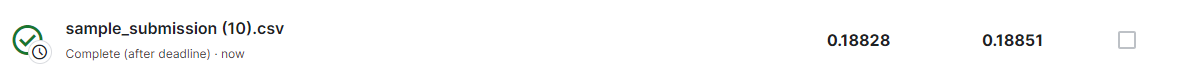

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе общего кол-ва продаж)

заменяются везде где меньше 3 (не остается в предиктах 0)

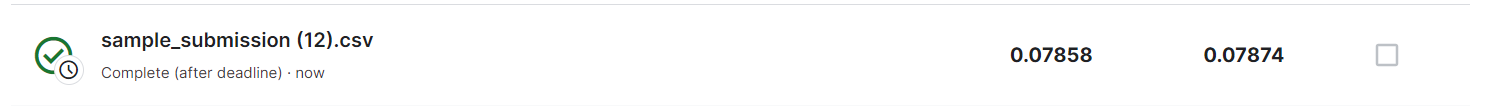

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов

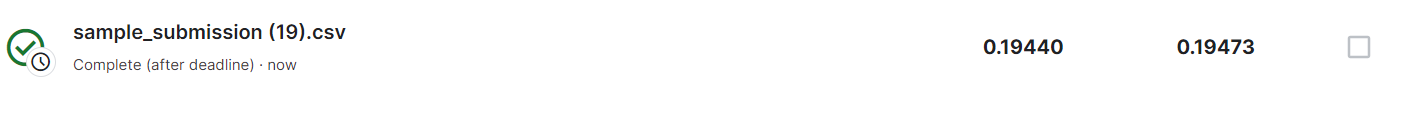

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя

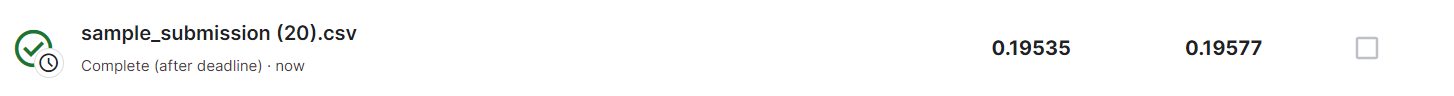

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

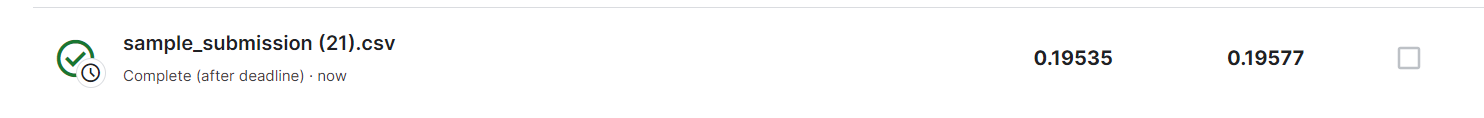

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 10 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

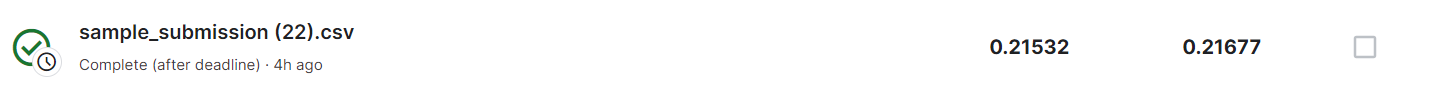

In [ ]:
AlternatingLeastSquares

factors=500
iterations=1
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 10 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

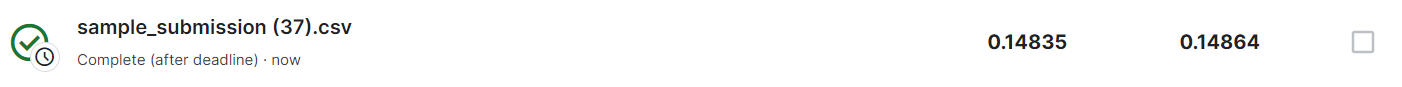

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 10 по общим продажам и больше 10000 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

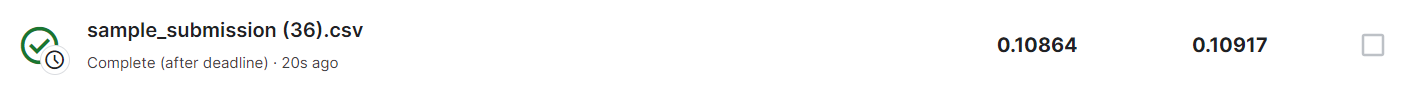

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где меньше 20 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов

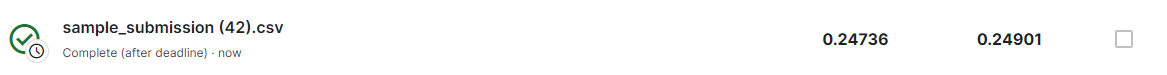

## Топ 10 продуктов для каждого пользователя

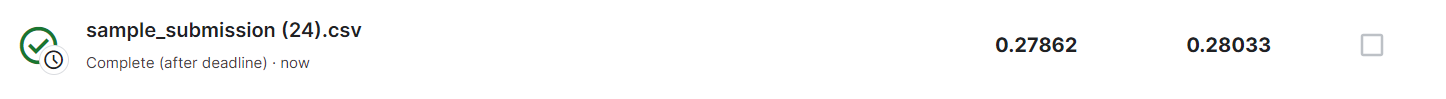

## LightFM

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo (на основе кол-ва продаж) ((data_merge_group_new_2['n_sold']) / (
    data_merge_group_new_2['n_sold'].max()))

ничего не заменеются / не удаляется

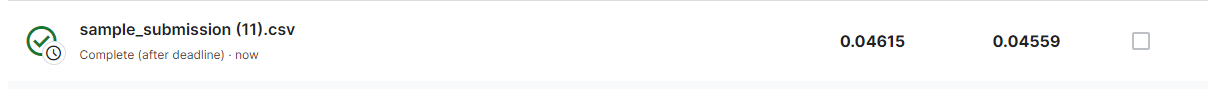

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo (на основе кол-ва продаж) (1 / (
    data_merge_group_new_2['n_sold']))

ничего не заменяется / не удаляется

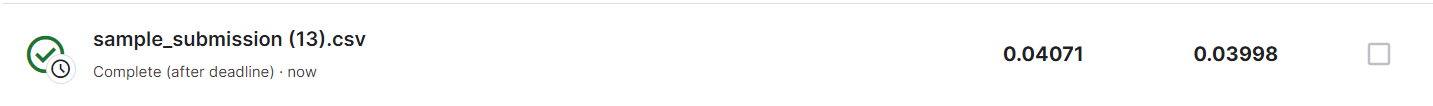

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo

ничего не заменяются / не удаляется

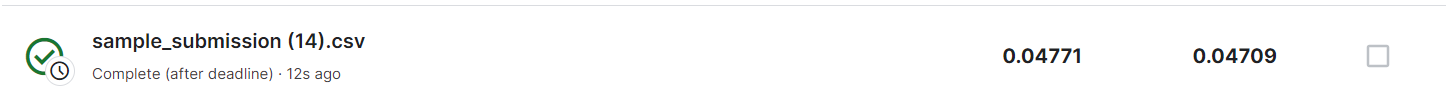

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

заменяются везде где меньше 3 (остается в предиктах 0)

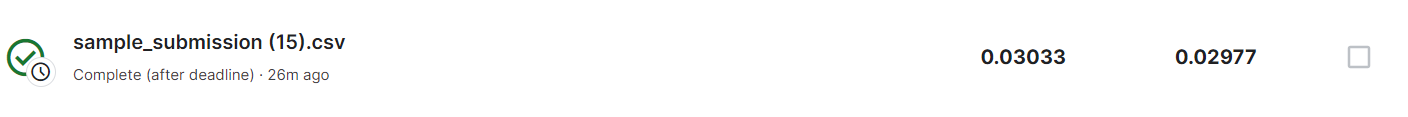

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

удаляются везде где меньше 3 (остается в предиктах 0)

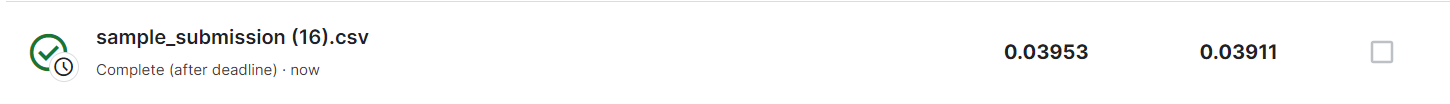

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

удаляются везде где меньше 3 (не остается в предиктах 0)

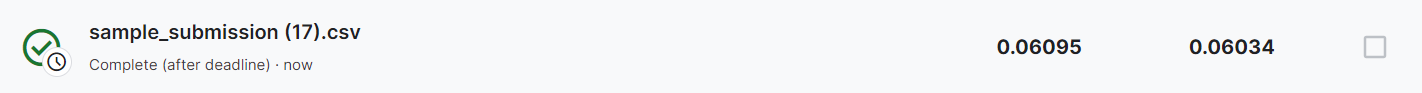

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo
без учета признаков

ничего не удаляется

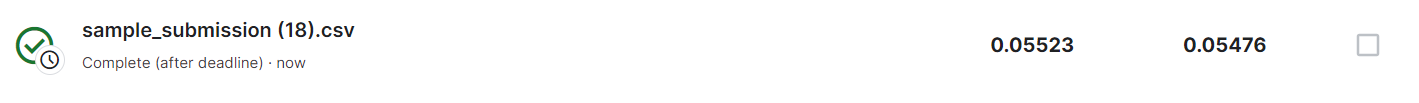

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

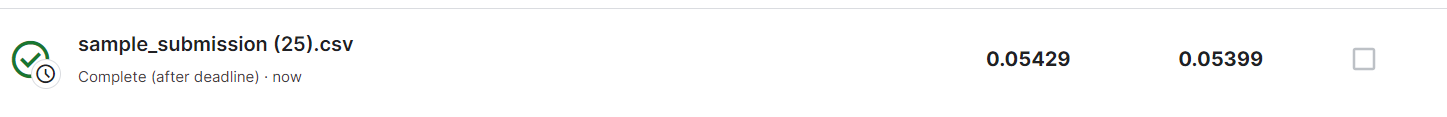

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo (n/n_max)
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

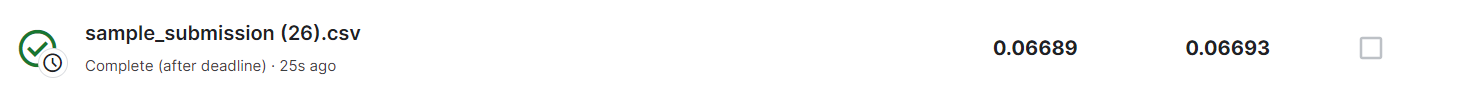

In [ ]:
LightFM

no_components=128,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

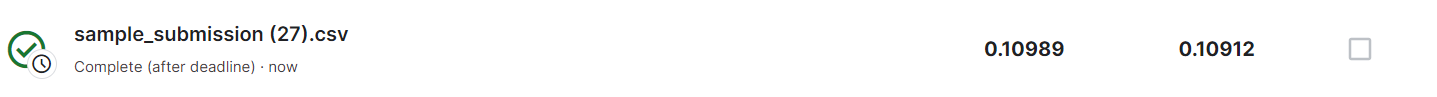

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

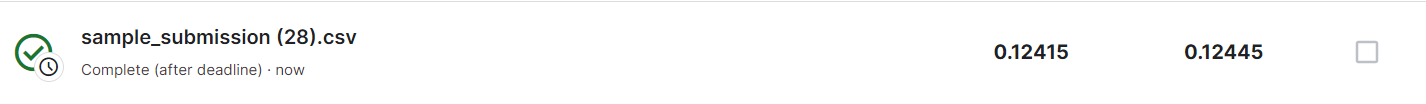

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo (n/n_max)
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

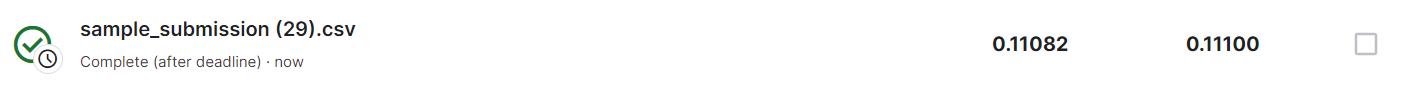

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo (1/n)
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

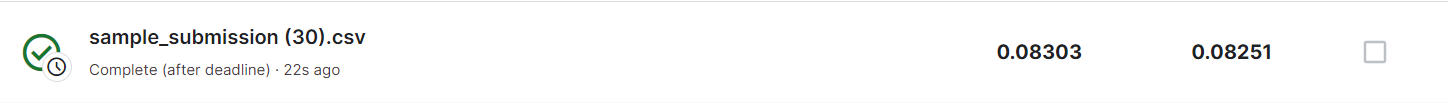

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo (1/n_max)
без учета признаков

удаляются везде где меньше 10 (не остается в предиктах 0)

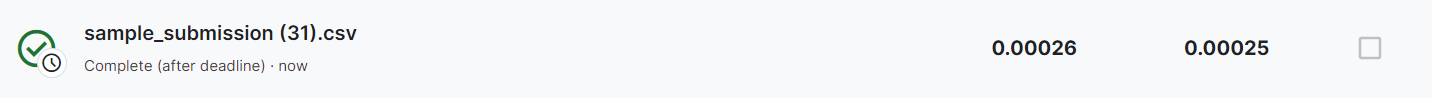

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo
без учета признаков

ничего не удаляется

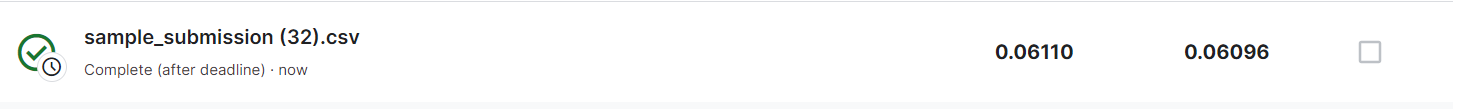

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo (n)
без учета признаков

ничего не удаляется

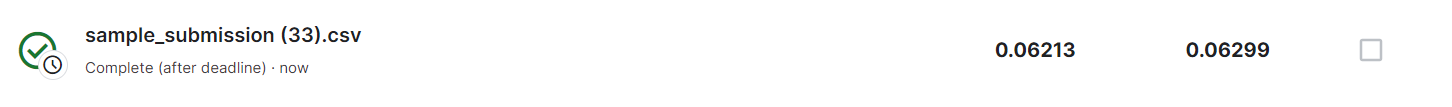

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo
признаки продуктов ('product_name',	'aisle',	'department')

удаляются везде где меньше 10

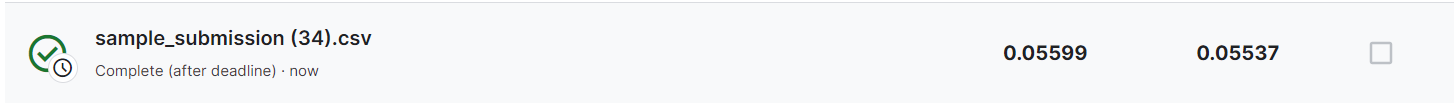

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo
без признаков

удаляются везде где меньше 10

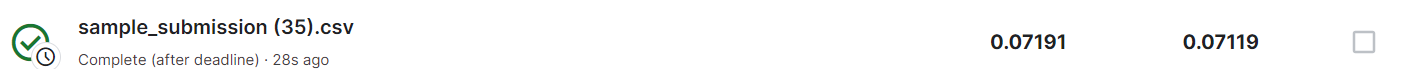

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo
признаки продуктов ('aisle')

удаляются везде где меньше 10

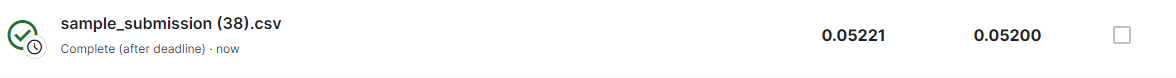

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo
признаки продуктов ('n_sold_full') (в виде строк числа)
признаки пользователей ('n_buy_full') (в виде строк числа)

удаляются везде где меньше 10

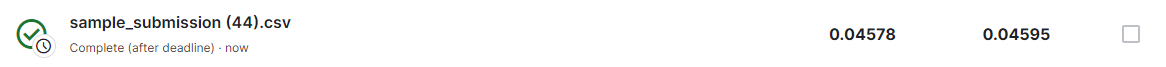

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпох

coo
признаки продуктов ('n_sold_full') (в виде чисел числа)
признаки пользователей ('n_buy_full') (в виде чисел числа)

удаляются везде где меньше 10

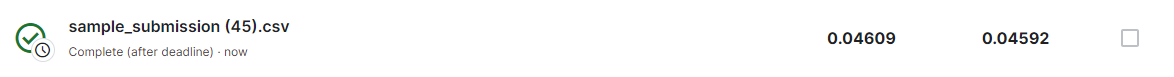

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo
признаки продуктов ('n_sold_full')
признаки пользователей ('n_buy_full')

удаляются везде где меньше 10

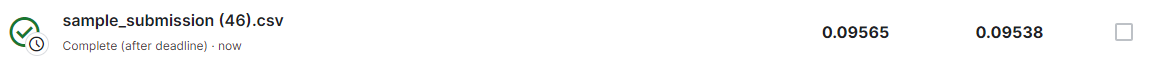

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

200 эпох

coo
признаки продуктов ('n_sold_full')
признаки пользователей ('n_buy_full')

удаляются везде где меньше 10

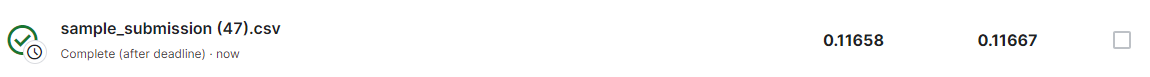

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

200 эпох

coo
признаки продуктов ('n_sold_full') добавить признаки
признаки пользователей ('n_buy_full')

удаляются везде где меньше 10

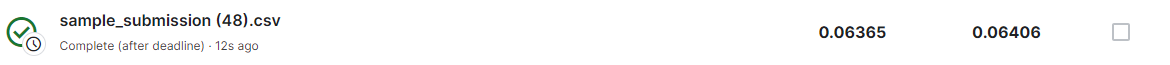

In [ ]:
LightFM

no_components=512,
learning_rate=0.05,
loss='warp',
random_state=42

200 эпох

coo
признаки продуктов ('n_sold_full')
признаки пользователей ('n_buy_full')

удаляются везде где меньше 10

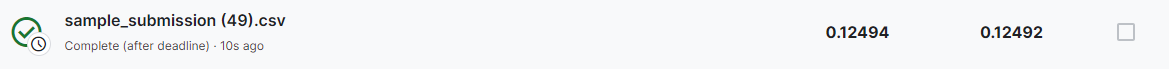

In [ ]:
LightFM

no_components=256,
learning_rate=0.05,
loss='warp',
random_state=42

100 эпох

coo
признаки продуктов ('n_sold_full')
признаки пользователей ('n_buy_full')

ничего не удаляется

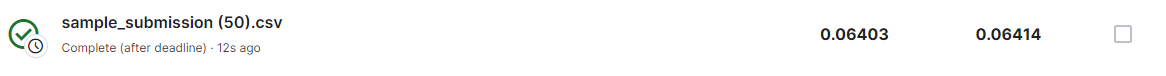

### .